In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.insert(0, '/home/ubuntu/Documents/NMDinStars/mesa_mod/mesa-r12778/star/test_suite/NeutrinoMagneticDipoleMesa')

from MesaOutput import MesaOutput
from mesa_reader import MesaData

In [2]:
m = MesaOutput('/media/ubuntu/T7/mesa-1296', read=False)

In [3]:
badData = m.onlyConverging()

In [4]:
# get the i-bands
iBandData = pd.read_csv("/home/ubuntu/Documents/NMDinStars/mesa_mod/mesa-r12778/star/test_suite/NeutrinoMagneticDipoleMesa/WorthyLeeBC/colorCorrections.txt",
           header=None)
iBand = iBandData[2]
iBandErr = iBandData[3]

iBand[:10]

0   -4.426
1   -5.353
2   -3.933
3   -3.750
4   -3.856
5   -4.548
6   -5.293
7   -3.564
8   -3.695
9   -3.949
Name: 2, dtype: float64

These are the I-Bands: 2    -3.933
12   -2.505
1    -5.353
Name: 2, dtype: float64

Plotting /media/ubuntu/T7/mesa-1296/out_1_2_2_0/nmdm_1_2_2_0.data

Plotting /media/ubuntu/T7/mesa-1296/out_4_5_2_3/nmdm_4_5_2_3.data

Plotting /media/ubuntu/T7/mesa-1296/out_5_4_2_5/nmdm_5_4_2_5.data


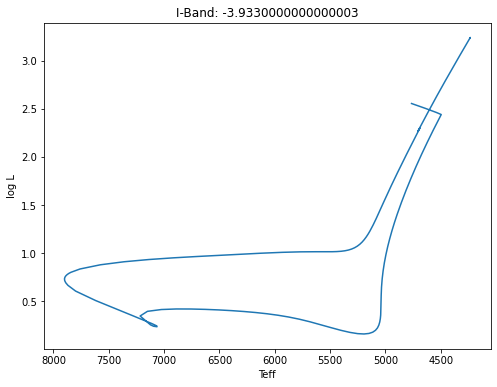

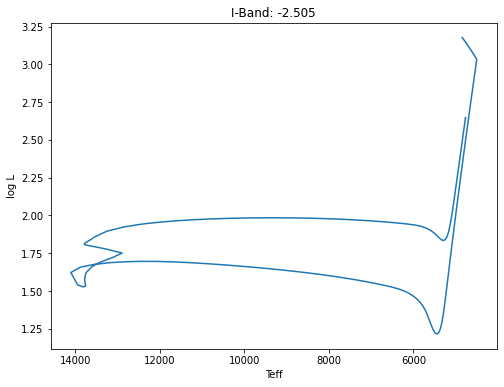

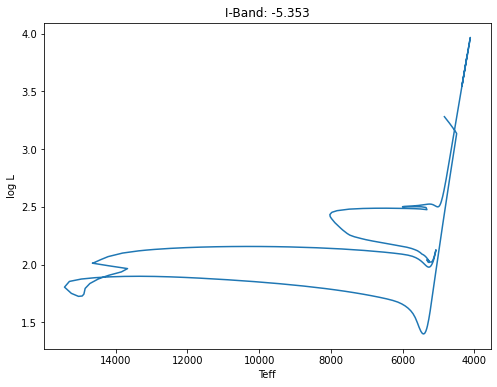

In [5]:
idxs = np.array([2, 12, 1])
labels = ['Normal', 'Small', 'Large']

print(f'These are the I-Bands: {iBand[idxs]}')

filepaths = m.dataPaths[idxs]

for f, I in zip(filepaths, iBand[idxs]):
    print()
    print(f'Plotting {f}')
    
    mesa = MesaData(f)
    
    fig, ax = plt.subplots(1, figsize=(8,6))
    ax.plot(mesa.effective_T, mesa.log_L)
    
    ax.set_title(f'I-Band: {I}')
    ax.set_ylabel('log L')
    ax.set_xlabel('Teff')
    
    plt.gca().invert_xaxis()